<a href="https://colab.research.google.com/github/kenneth-nguyenn/02_ADS_Project/blob/1712727/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 02:
1. 1712258 - Nguyễn Văn Hậu - [kenneth-nguyenn](https://github.com/kenneth-nguyenn)
2. 1712727 - Nguyễn Hoàng Sơn -  [hsjune29th](https://github.com/hsjune29th)
3. 1712888 - Nguyễn Đình Tuyên - [Tuyen177](https://github.com/Tuyen177) (nghỉ)

Phân công công việc tại [Google Sheet](https://docs.google.com/spreadsheets/d/1eKbhc6rpNsDoBfTC8SfAnlKiw_y3_OvHUefUuxQw8BI/edit#gid=621371829)

Link thùng chứa Github của nhóm tại [02_ADS_Project](https://github.com/kenneth-nguyenn/02_ADS_Project)

## 1. Mô tả bài toán:

### 1.1. Thông tin chung:

- **Tên cuộc thi:** [Google Brain - Ventilator Pressure Prediction](https://www.kaggle.com/competitions/ventilator-pressure-prediction/data?select=test.csv)
- **Mô tả:** Được tổ chức bởi Google Brain vào 04/11/2021 với hơn 2,605 nhóm tham dự.
- **Input:** Tập dữ liệu được thu thập từ một hệ thống máy thở cung cấp khí oxy cho phổi.
- **Output:** Dự đoán áp lực trên đường thở (pressure).
- **Bài toán: Regression**
- **Độ đo:**
    + Cuộc thi sẽ được tính điểm là trung bình sai số tuyệt đối giữa áp suất dự đoán và áp suất thực tế trong giai đoạn hít thở của mỗi nhịp thở.
    + Công thức: $|X-Y|$

### 1.2. Ý nghĩa thực tiễn:

- Trên thực tế, trong thở máy có 3 mode thở cơ bản là: Kiểm soát, Hỗ trợ, Tự thở.
    - Ứng với Kiểm soát (control/limit), có 3 loại kiểm soát:
        + **Pressure Controlled:** Giới hạn áp lực, cài đặt Pi, thể tích thay đổi.
        + **Volume Controlled:** Mục tiêu thể tích, cài đặt Vt, áp lực thay đổi.
        + **Dual Controlled:** Mục tiêu thể tích và giới hạn áp lực, cài đặt Vt, máy tự điều chỉnh Pi.
    - Công việc của các bác sĩ lâm sàng là theo dõi bệnh nhân thở máy về: Áp lực đường thở và Thể tích khí lưu thông.
    - **Ưu điểm** của Pressure Control:
        + Hạn chế báo động áp lực cao.
        + Cải thiện sự phân phối khí trong phổi.
        + Và một số ưu điểm khác liên quan đến các con số trong y khoa.
    - **Khuyết điểm** của Pressure Control: Vt thay đổi khi phổi thay đổi R và C:
        + Vt quá lớn thì quá căng phế nang.
        + Vt quá nhỏ thì giảm thông khí phế nang, ứ CO2.
    - **Ứng dụng** lâm sàng:
        + Dùng cho trẻ sơ sinh dưới (10kg).
        + Bệnh nhân có tổn thương phổi (R cao hoặc C thấp).
        + Nhiều nghiên cứu so sánh Pressure và Volume Control chỉ ra Pressure cải thiện oxy trong máu tốt hơn, ít biến chứng, phù hợp nhu cầu của bệnh nhân.
-  Thở máy là một biện pháp chuyên sâu của bác sĩ lâm sàng. Dưới sự khẩn thiết của đại dịch COVID-19 trên diện rộng, ta dễ dàng thấy hạn chế của việc sử dụng phương pháp thở máy này. Việc phát triển các phương pháp mới để điều khiển máy thở cơ học rất tốn kém, gặp khó khăn khi thử nghiệm lâm sàng.
- Nhóm nghiên cứu tại Google Brain tin rằng, khi đã có thông tin R và C của phổi bệnh nhân, cùng với sự kiểm soát lượng khí đi vào phổi, ta hoàn toàn có thể **điều khiển Pi một cách tự động, thích nghi nhanh chóng.**
- Bài toán này cũng là tiền đề cho các thuật toán thích ứng với bệnh nhân, giúp giảm bớt gánh nặng cho bác sĩ lâm sàng trong tình hình mới. Do đó, các phương pháp điều trị bằng máy thở có thể được phổ biến rộng rãi hơn để giúp bệnh nhân thở dễ dàng.

### 1.3. Phương pháp thu thập dữ liệu:

- Dữ liệu được sử dụng trong cuộc thi này được tạo ra bằng một hệ thống sử dụng một máy thở đã kết nối với phổi nhân tạo thông qua một mạch hô hấp, cùng các thiết bị đo đạc, kiểm soát các thông số trong một chu kỳ thở máy.
- Sơ đồ thu thập dữ liệu trong một chu kì thở máy có flow như sau: 
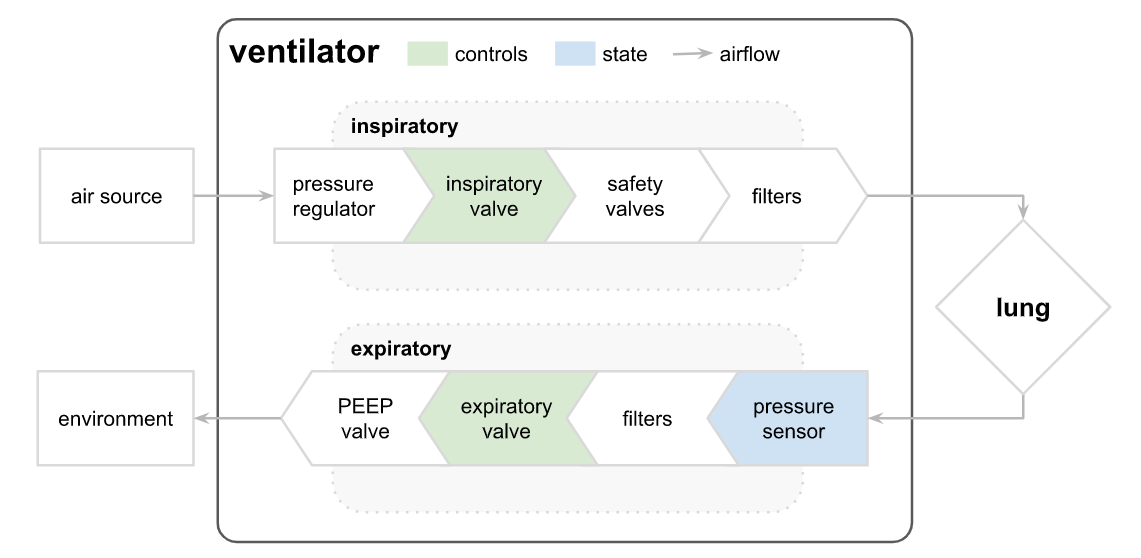

Hai đầu vào điều khiển được đánh dấu màu xanh lá cây: 
- Inspiratory valve: biến liên tục [0:100] đại diện cho tỷ lệ phần trăm van điện tử của máy thở được mở để cho không khí vào phổi.
- Expiratory valve: biến nhị phân (0,1) đại diện cho van thăm dò đang  (1) hoặc đóng (0) để thoát khí ra ngoài.

Trong cuộc thi này, những người tham gia được cung cấp nhiều chuỗi thời gian thở và sẽ học cách dự đoán áp lực đường thở trong mạch hô hấp trong quá trình thở dựa trên chuỗi thời gian của đầu vào kiểm soát.

Mỗi chuỗi thời gian đại diện cho một nhịp thở khoảng 3 giây. Các tệp được sắp xếp sao cho mỗi hàng là một bước thời gian trong hơi thở và đưa ra hai tín hiệu điều khiển, kết quả là áp lực đường thở và các thuộc tính liên quan của phổi.

## 2. Giải pháp của bài toán:

### 2.1. Ý tưởng:

- Nhóm quyết định tìm hiểu và cài đặt giải pháp **"[The inverse of a PID controller](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283)"**, giải pháp đứng vị thứ hai trong leaderboard.
- Qúa trình hoàn thành cuộc thi, nhóm tác giả thực hiện ba giai đoạn chính:
    + Sử dụng 7 model được share từ @dlaststark ([notebook](https://www.kaggle.com/code/dlaststark/gb-vpp-pulp-fiction/notebook)). Trong notebook này, tác giả trên tập trung vào `Feature Engineering` và xây dựng `
Keras DNN Model` trên TPU.
    + Tiếp theo, tác giả tập hợp các dự đoán của 7 model trên bằng cách kết hợp điểm mạnh của giá trị median và mean [tại đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/282735).
    + Cuối cùng, tác giả cố gắng xác định hàm nghịch đảo của PID controller (tìm nghịch đảo của bộ điều khiển P và sau đó chuyển sang bộ điều khiển PI) để dự đoán áp suất, được thảo luận [tại đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283).

### 2.2. Lý do lựa chọn giải pháp:

- Giải pháp đứng vị thứ hai, nằm trong trong TOP-10 leaderboard.
- Hầu hết, các giải pháp đứng trong TOP đầu của leaderboard đều sử dụng đến **PID controller** để giải quyết bài toán này. Mặt khác, trong quá trình đọc phần notebook cũng như giải thích của tác giả, nhóm em cảm thấy dễ hiểu và nắm được cơ bản quá trình xử lý trong notebook.

### 2.4. Mô tả các thuộc tính trong tập dữ liệu:

- `id`: mã định danh của mỗi nhịp thở trên toàn bộ tệp.
- `breath_id`: mã định danh của mỗi phổi trên toàn bộ tệp.
- `R`: là một thuộc tính của phổi cho biết mức độ hạn chế của đường thở (restricted the airway), cho biết sự thay đổi áp suất trên mỗi sự thay đổi lưu lượng khí thở.
- `C`: là một thuộc tính của phổi cho biết mức độ tuân thủ của phổi (compliant), cho biết sự thay đổi thể tích trên mỗi lần thay đổi áp suất.
- `time_step`: dấu thời gian thực tế.
- `u_in`: cho biết độ mở van đầu vào điện tử điều khiển, nhận giá trị tính theo phần trăm năm trong khoảng [0:100].
- `u_out`: cho biết độ mở đầu ra van thăm dò điều khiển, nhận một trong hai giá trị (0,1).
- `pressure`: áp lực đường thở đo trong mạch hô hấp, cũng là thuộc tính cần dự đoán.

## 3. Giải quyết bài toán:

### Import libraries:

In [ ]:
import gc
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply

np.random.seed(42)
tf.random.set_seed(42)

from joblib import Parallel, delayed
import pickle
from IPython.display import display

### 3.1. Đọc dữ liệu:

In [ ]:
# train.csv
!gdown https://drive.google.com/u/1/uc?id=14PVjC4WigAqnUuNis3tyeuEtaQltN6e-&export=download&confirm=t 
# test.csv
!gdown https://drive.google.com/u/1/uc?id=1bn1ugqDU_fqs1O7av-OAJ7BjbJWj2UIj&export=download&confirm=t
# submission.csv
!gdown https://drive.google.com/uc?id=1oeJJVvSkC2zVqzzvEdFceX8jVx6gHBiF&export=download&confirm=t

Downloading...
From: https://drive.google.com/u/1/uc?id=14PVjC4WigAqnUuNis3tyeuEtaQltN6e-
To: /content/train.csv
100% 440M/440M [00:06<00:00, 72.4MB/s]
Downloading...
From: https://drive.google.com/u/1/uc?id=1bn1ugqDU_fqs1O7av-OAJ7BjbJWj2UIj
To: /content/test.csv
100% 220M/220M [00:02<00:00, 86.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oeJJVvSkC2zVqzzvEdFceX8jVx6gHBiF
To: /content/sample_submission.csv
100% 39.1M/39.1M [00:00<00:00, 81.4MB/s]


In [ ]:
train_df = pd.read_csv('/content/train.csv')
print(f"train_df: {train_df.shape}")

train_df: (6036000, 8)


In [ ]:
test_df = pd.read_csv('/content/test.csv')
print(f"test_df: {test_df.shape}")

test_df: (4024000, 7)


In [ ]:
sample_submission = pd.read_csv("/content/sample_submission.csv")

### 3.1.1. Khám phá dữ liệu:

Class `HorizontalDisplay` hỗ trợ hiển thị.

In [ ]:
class HorizontalDisplay:
    """Hỗ trợ hiển thị dataframe"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        template = '<div style="float: left; padding: 10px;">{0}</div>'
        return "\n".join(template.format(arg._repr_html_())
                         for arg in self.args)

Xem từng record của từng file:

In [ ]:
HorizontalDisplay(train_df, test_df, sample_submission)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [ ]:
data = pd.concat([train_df, test_df]).reset_index(drop=True)
HorizontalDisplay(
    data["breath_id"].value_counts().to_frame(), 
    data["R"].value_counts().to_frame(),
    data["C"].value_counts().to_frame()
)

,breath_id
1,80
20976,80
20970,80
20968,80
20967,80
...,...
69871,80
69870,80
69869,80
69866,80


Như vậy:
- Trên toàn bộ dữ liệu, thuộc tính `R`, và `C` đều có ba giá trị khác nhau, các giá trị này không chênh lệch quá nhiều.
- Trên toàn bộ dữ liệu, có 125750 `breath_id` được thu thập.

Kiểm tra tất cả các `breath_id` đều đủ 80 nhịp thở?

In [ ]:
sum(data["breath_id"].value_counts() != 80)

0

Kết quả trên cho thấy: Không có `breath_id` nào có tổng số nhịp thở khác 80. Nói cách khác, trên tất cả dữ liệu có được, tất cả các `breath_id` đều có đủ 80 nhịp thở.

Phân phối `pressure` ứng với `u_out`:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


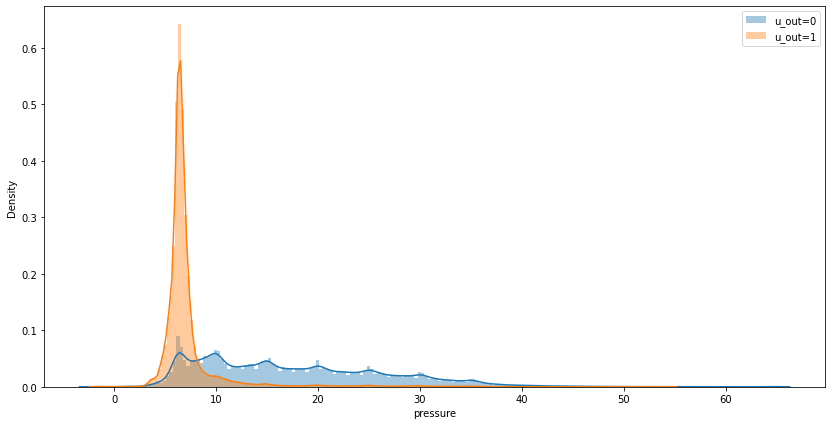

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.distplot(train_df.loc[train_df["u_out"] == 0, "pressure"], ax=ax, label="u_out=0", bins=200)
ax = sns.distplot(train_df.loc[train_df["u_out"] == 1, "pressure"], ax=ax, label="u_out=1", bins=200)
plt.legend(loc='upper right');

Như vậy,
- Với u_out = 0, tức là khi không có khí đi ra, các giá trị `pressure` tập trung trong khoảng từ 6 đến 35.
- Với u_out = 1, tức là khi có khí đi ra, các giá trị `pressure` tập trung trong khoảng từ 4 đến 10.

Phân phối `pressure` với từng kích thước trong thuộc tính `R`:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

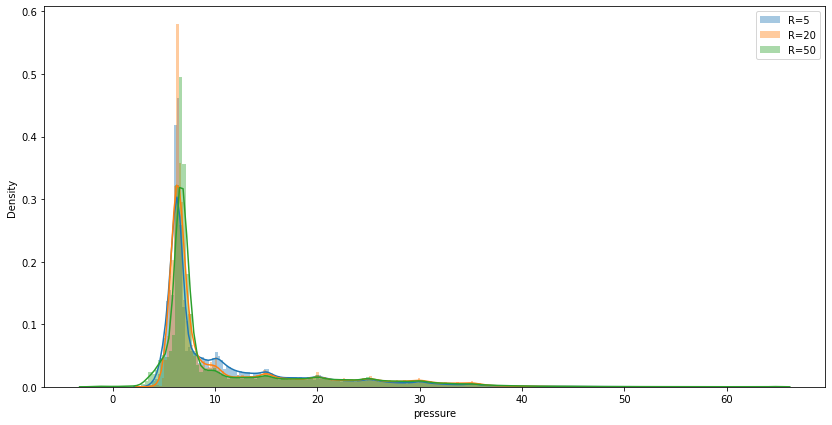

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.distplot(train_df.loc[train_df["R"] == 5, "pressure"], ax=ax, label="R=5", bins=200)
ax = sns.distplot(train_df.loc[train_df["R"] == 20, "pressure"], ax=ax, label="R=20", bins=200)
ax = sns.distplot(train_df.loc[train_df["R"] == 50, "pressure"], ax=ax, label="R=50", bins=200)
plt.legend(loc='upper right');

Hầu hết, các giá trị `pressure` tập trung ở mức từ 5 đến 10.

Phân bố pressure ứng với từng giá trịtrong thuộc tính `C`:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

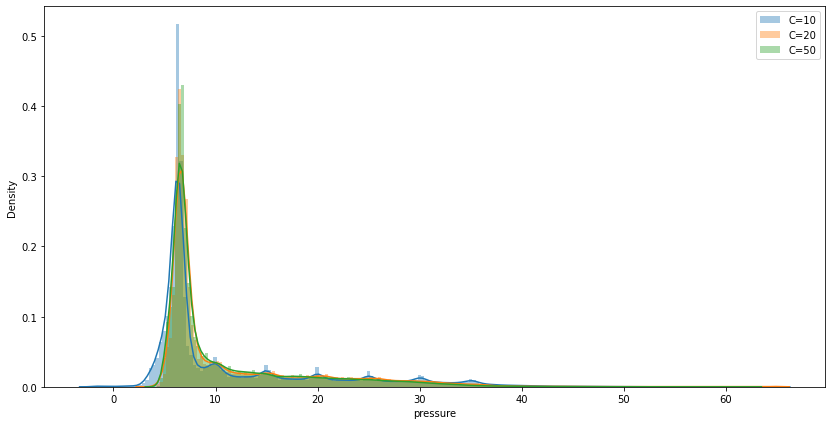

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.distplot(train_df.loc[train_df["C"] == 10, "pressure"], ax=ax, label="C=10", bins=200)
ax = sns.distplot(train_df.loc[train_df["C"] == 20, "pressure"], ax=ax, label="C=20", bins=200)
ax = sns.distplot(train_df.loc[train_df["C"] == 50, "pressure"], ax=ax, label="C=50", bins=200)
plt.legend(loc='upper right');

Hầu hết, các giá trị `pressure` tập trung ở mức từ 5 đến 10. Với C mang giá trị 10 có phân bố `pressure` thấp hơn với mức 4.

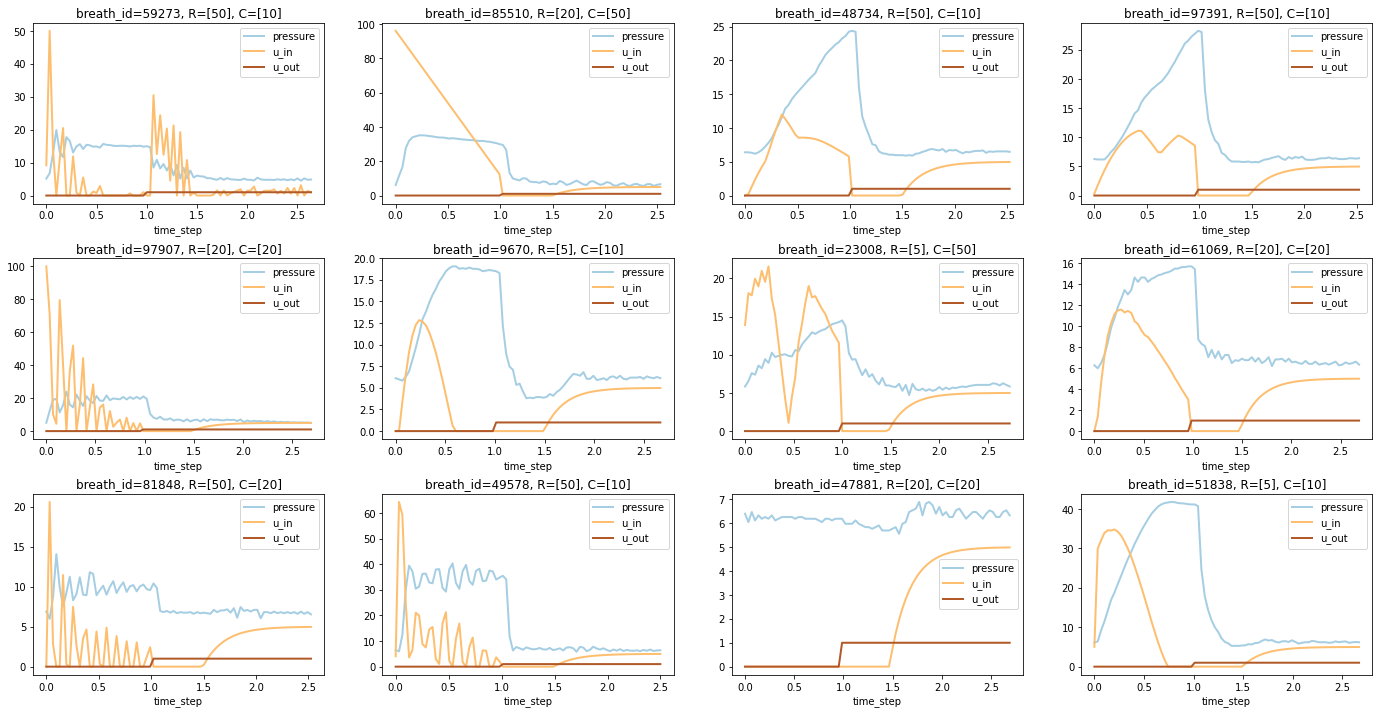

In [ ]:
breath_ids = list(train_df["breath_id"].sample(12))
fig, axes = plt.subplots(figsize=(24, 12), ncols=4, nrows=3)
axes = np.ravel(axes)
for b, ax in zip(breath_ids, axes):
    _df = train_df[train_df["breath_id"]==b].copy()
    (_df
     .set_index("time_step")[["pressure", "u_in", "u_out"]]
     .plot(colormap='Paired',
           ax=ax,
           title=f"breath_id={b}, R={_df['R'].unique()}, C={_df['C'].unique()}", 
           linewidth=2)
    )

fig.subplots_adjust(hspace=0.3);

In [ ]:
# Dọn dẹp hết biến ở phần này:
del data, fig, breath_ids, axes, b

### 3.2. Feature Engineer:

Quá trình Feature Engineer chia làm 8 bước được mô tả chi tiết như bên dưới. Sau quá trình phân tích, tất cả các quá trình được thực hiện trong một hàm duy nhất là `add_features` với input là một dataframe với 7 features và ouput là một dataframe có 71 features.

Để không làm ảnh hướng đến data, các phần trực quan về feature được thực hiện trong `small_df` được trích một phần từ tập `train_df`.

In [ ]:
small_df = train_df.loc[0:799,].copy()

Quá trình feature chia làm 8 bước:

#### 3.2.1. Các feature mang tính vật lý:

Tính vật lý được thể hiện ở diện tích phổi, thể tích lượng khí mà phối chứa...

`area` là feature thể hiện cho diện tích lượng khí thở tương ứng với từng phổi dựa vào độ mở của van khí vào nhân với bước thời gian.

In [ ]:
 # Tính tổng lượng khí thở ở mức thời gian tương ứng với độ mở của van khí vào.
 small_df['area'] = small_df['time_step'] * small_df['u_in']
 small_df[['area']].iloc[:80]

,area
0,0.000000
1,0.618632
2,1.519701
3,2.316059
4,3.442197
...,...
75,12.702783
76,12.883083
77,13.061275
78,13.238051


In [ ]:
# Tính tổng tích lũy lượng khí tương ứng với từng phổi.
small_df['area'] = small_df.groupby('breath_id')['area'].cumsum()
small_df[['area']].iloc[:80]

,area
0,0.000000
1,0.618632
2,2.138333
3,4.454391
4,7.896588
...,...
75,585.651356
76,598.534439
77,611.595714
78,624.833765


`cross` là feature lấy tích của `u_in` và `u_out`. Vì `u_out` chỉ có hai giá trị là 0 và 1, nên feature này có thể tách được lượng khí `u_in` thực sự hữu ích owr pha khí ra.

In [ ]:
# Tính tích chéo của u_in và u_out
small_df['cross'] = small_df['u_in'] * small_df['u_out']
small_df[['cross']].iloc[0:80]

,cross
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
75,4.974474
76,4.978481
77,4.981847
78,4.984683


Tương tự, `cross2` là feature lấy các mốc thời gian thực sự hữu ích ở pha khí ra.

In [ ]:
# Tính tích chéo của time_step và u_out
small_df['cross2'] = small_df['time_step'] * small_df['u_out']
small_df[['cross2']].iloc[0:80]

,cross2
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
75,2.553593
76,2.587754
77,2.621773
78,2.655746


Feature `u_in_cumsum` là feature tính tổng tích lũy của lượng khí vào. Tính năng này được [thảo luận ở đây](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/273974), người đề xuất **@Carl McBrife Ellis** cho rằng nó cải thiện điểm đáng kể. Phía sau điều này chính là áp suất trong phổi tỉ lệ với lượng không khí thực sự được bơm vào phổi. Rõ ràng, tính năng này không hữu ích khi thở ra, nhưng vì giai đoạn thở ra không được tính điểm, vậy nên mọi thứ vẫn ổn. Trên thực tế, nó mang ý nghĩa thể hiện tốc độ thay đổi của áp suất được điều chỉnh bởi độ mở van (u_in).

In [ ]:
small_df['u_in_cumsum'] = (small_df['u_in']).groupby(small_df['breath_id']).cumsum()
small_df['u_in_cumsum'] .iloc[:80]

0       0.083334
1      18.466375
2      40.975653
3      63.784476
4      89.140326
         ...    
75    791.748433
76    796.726915
77    801.708762
78    806.693445
79    811.680524
Name: u_in_cumsum, Length: 80, dtype: float64

Tương tự, feature `time_step` cho thông tin về tổng thời gian tích lũy của mỗi phổi.

In [ ]:
small_df['time_step_cumsum'] = small_df.groupby(['breath_id'])['time_step'].cumsum()
small_df[['time_step_cumsum']].iloc[:80]

,time_step_cumsum
0,0.000000
1,0.033652
2,0.101167
3,0.202709
4,0.338464
...,...
75,97.013447
76,99.601200
77,102.222974
78,104.878720


#### 3.2.2. Lag Feature:

Lag feature là các giá trị mục tiêu từ các khoảng thời gian trước đó. Cụ thể, lag có thể hiểu là độ trễ về mặt thời gian. Ở lag_1, người ta sẽ thay thế giá trị tại thời gian t bằng giá trị tại thời gian trước đó là t-1. Tương tự với lag_2, lag_3, lag_4. Với lag_back, thay cho t-1 là t+1. Mặc định các giá trị đầu và giá trị cuối bị thiếu được mặc định là Nan. Kĩ thuật này thường được sử dụng trong dự báo chuỗi thời gian (time-series). 

In [ ]:
# Tạo các feature với độ trễ bằng 1 đơn vị thời gian
small_df['u_in_lag1'] = small_df.groupby('breath_id')['u_in'].shift(1)
small_df['u_out_lag1'] = small_df.groupby('breath_id')['u_out'].shift(1)
small_df['u_in_lag_back1'] = small_df.groupby('breath_id')['u_in'].shift(-1)
small_df['u_out_lag_back1'] = small_df.groupby('breath_id')['u_out'].shift(-1)

In [ ]:
small_df[['u_in_lag1']].iloc[:80]

,u_in_lag1
0,NaN
1,0.083334
2,18.383041
3,22.509278
4,22.808822
...,...
75,4.969730
76,4.974474
77,4.978481
78,4.981847


In [ ]:
# Tương tự với độ trê  2, 3, 4 đơn vị thời gian
small_df['u_in_lag2'] = small_df.groupby('breath_id')['u_in'].shift(2)
small_df['u_out_lag2'] = small_df.groupby('breath_id')['u_out'].shift(2)
small_df['u_in_lag_back2'] = small_df.groupby('breath_id')['u_in'].shift(-2)
small_df['u_out_lag_back2'] = small_df.groupby('breath_id')['u_out'].shift(-2)

small_df['u_in_lag3'] = small_df.groupby('breath_id')['u_in'].shift(3)
small_df['u_out_lag3'] = small_df.groupby('breath_id')['u_out'].shift(3)
small_df['u_in_lag_back3'] = small_df.groupby('breath_id')['u_in'].shift(-3)
small_df['u_out_lag_back3'] = small_df.groupby('breath_id')['u_out'].shift(-3)

small_df['u_in_lag4'] = small_df.groupby('breath_id')['u_in'].shift(4)
small_df['u_out_lag4'] = small_df.groupby('breath_id')['u_out'].shift(4)
small_df['u_in_lag_back4'] = small_df.groupby('breath_id')['u_in'].shift(-4)
small_df['u_out_lag_back4'] = small_df.groupby('breath_id')['u_out'].shift(-4)

Cuối cùng, thay thế các giá trị NaN bằng số 0

In [ ]:
small_df = small_df.fillna(0)

In [ ]:
small_df['u_in_lag1'].isna().sum()

0

#### 3.2.3. Giá trị max, mean của u_in trong từng phổi:

Feature `breath_id__u_in__max` thể hiện lượng khí lớn nhất ứng với mỗi phổi. Lượng khí trong phổi có mối liên hệ với áp lực trên đường thở, với lượng khí lớn có thể gây ra áp lực cao lên đường thở.

In [ ]:
small_df['breath_id__u_in__max'] = small_df.groupby(['breath_id'])['u_in'].transform('max')
small_df[['breath_id__u_in__max']].iloc[:80]

,breath_id__u_in__max
0,28.313036
1,28.313036
2,28.313036
3,28.313036
4,28.313036
...,...
75,28.313036
76,28.313036
77,28.313036
78,28.313036


Tương tự, feature `breath_id__u_in__mean` thể hiện lượng khí trung bình của mỗi phổi. 

In [ ]:
small_df['breath_id__u_in__mean'] = small_df.groupby(['breath_id'])['u_in'].transform('mean')

Feature `breath_id__u_in__diffmax` là đặc trưng cho biết khoảng cách giữa giá trị **max** với `u_in`.

In [ ]:
small_df['breath_id__u_in__diffmax'] = small_df.groupby(
    ['breath_id'])['u_in'].transform('max') - small_df['u_in']
small_df[['breath_id__u_in__diffmax']].iloc[:80]

,breath_id__u_in__diffmax
0,28.229702
1,9.929994
2,5.803758
3,5.504214
4,2.957185
...,...
75,23.338562
76,23.334554
77,23.331188
78,23.328353


Tương tự, feature `breath_id__u_in__diffmean` cho biết khoảng cách giữa các giá trị **mean** với `u_in`.

In [ ]:
small_df['breath_id__u_in__diffmean'] = small_df.groupby(
    ['breath_id'])['u_in'].transform('mean') - small_df['u_in']

#### 3.2.4. Sự thay đổi của bộ điều khiển là áp suất:

Đầu tiên, 2 feature u_in_diff1 và u_out_diff1 thể hiện sự thay đổi của u_in và u_out so với lần đo trước đó


*   Đối với u_in_diff1 chúng ta biết được van đầu vào của bộ điều khiển là áp suất (tức là đầu ra của bộ điều khiển kỹ thuật số) có đang mở ra thêm (+) hay đóng lại bớt (-) hay không và giá trị đó là bao nhiêu

*  Đối với u_out_diff1, chúng ta thấy rằng u_out ít khi thay đổi giá trị sau mỗi id, cụ thể là 2 lần trong mỗi bước thở 3s: 1 lần mở van ra, sau đó có khá nhiều giá trị u_in=0, 1 lần đóng van lại đồng nghĩa với kết thúc 1 nhịp thở







In [ ]:
small_df['u_in_diff1'] = small_df['u_in'] - small_df['u_in_lag1']
small_df['u_out_diff1'] = small_df['u_out'] - small_df['u_out_lag1']

Tương tự, các feature u_in_diff2, u_in_diff3, u_in_diff4 và u_out_diff2, u_out_diff3, u_out_diff4 thể hiện sự thay đổi của u_in và u_out so với 2, 3, 4 lần đo trước đó
Khả năng cao Kaggle đã không xếp 80 lần đo của nhịp thở có ID gần nhau, chúng có thể dựa trên sự thay đổi này để sắp xếp lại các id cùng nhịp thở để kết quả chính xác hơn

In [ ]:
small_df['u_in_diff2'] = small_df['u_in'] - small_df['u_in_lag2']
small_df['u_out_diff2'] = small_df['u_out'] - small_df['u_out_lag2']
small_df['u_in_diff3'] = small_df['u_in'] - small_df['u_in_lag3']
small_df['u_out_diff3'] = small_df['u_out'] - small_df['u_out_lag3']
small_df['u_in_diff4'] = small_df['u_in'] - small_df['u_in_lag4']
small_df['u_out_diff4'] = small_df['u_out'] - small_df['u_out_lag4']
pd.DataFrame(small_df,columns=['u_in', 'u_in_diff1', 'u_in_diff2', 'u_in_diff3', 'u_in_diff4', 'u_out','u_out_diff1','u_out_diff2', 'u_out_diff3','u_out_diff4' ])

,u_in,u_in_diff1,u_in_diff2,u_in_diff3,u_in_diff4,u_out,u_out_diff1,u_out_diff2,u_out_diff3,u_out_diff4
0,0.083334,0.083334,0.083334,0.083334,0.083334,0,0.0,0.0,0.0,0.0
1,18.383041,18.299707,18.383041,18.383041,18.383041,0,0.0,0.0,0.0,0.0
2,22.509278,4.126236,22.425944,22.509278,22.509278,0,0.0,0.0,0.0,0.0
3,22.808822,0.299544,4.425781,22.725488,22.808822,0,0.0,0.0,0.0,0.0
4,25.355850,2.547028,2.846573,6.972809,25.272516,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
795,4.945038,0.009539,0.020697,0.033822,0.049212,1,0.0,0.0,0.0,0.0
796,4.953164,0.008126,0.017665,0.028823,0.041948,1,0.0,0.0,0.0,0.0
797,4.960086,0.006922,0.015048,0.024587,0.035745,1,0.0,0.0,0.0,0.0
798,4.965973,0.005887,0.012809,0.020935,0.030474,1,0.0,0.0,0.0,0.0


#### 3.2.5. Phân tích thay đổi trong một nhịp thở:

Các feature tạo ra trong bước này chủ yếu để xử lí các lần đo trong cùng một nhịp nhở

Đánh dấu số thứ tự trong mỗi nhịp thở

In [ ]:
small_df['one'] = 1
small_df['count'] = (small_df['one']).groupby(small_df['breath_id']).cumsum()

Giá trị trung bình u_in ở thời điểm hiện tại của một nhịp thở ( bằng tổng u_in đã đo được trong nhịp thở/ số lần đo trong nhịp thở này)

In [ ]:
small_df['u_in_cummean'] = small_df['u_in_cumsum'] / small_df['count']

Xem 2 lần đo kề nhau (hoặc cách nhau 1 ần đo) có cùng đo trong 1 nhịp thở hay không:

In [ ]:
small_df['breath_id_lag']=small_df['breath_id'].shift(1).fillna(0)
small_df['breath_id_lag2']=small_df['breath_id'].shift(2).fillna(0)
small_df['breath_id_lagsame']=np.select([small_df['breath_id_lag']==small_df['breath_id']],[1],0)
small_df['breath_id_lag2same']=np.select([small_df['breath_id_lag2']==small_df['breath_id']],[1],0)

Sau đó, tác giả tạo ra breath_id__u_in_lag tương tự như u_in_diff, nhưng chỉ khác là các nhịp thở sẽ riêng biệt hơn, tức là không so sánh lần đo đầu tiên của nhịp thở sau so với lần đo cuối cùng của nhịp thở trước

In [ ]:
small_df['breath_id__u_in_lag'] = small_df['u_in'].shift(1).fillna(0)
small_df['breath_id__u_in_lag'] = small_df['breath_id__u_in_lag'] * small_df['breath_id_lagsame']
small_df['breath_id__u_in_lag2'] = small_df['u_in'].shift(2).fillna(0)
small_df['breath_id__u_in_lag2'] = small_df['breath_id__u_in_lag2'] * small_df['breath_id_lag2same']
pd.DataFrame(small_df,columns=['breath_id','count', 'u_in', 'u_in_cummean', 'breath_id__u_in_lag', 'breath_id__u_in_lag2'])

,breath_id,count,u_in,u_in_cummean,breath_id__u_in_lag,breath_id__u_in_lag2
0,1,1,0.083334,0.083334,0.000000,0.000000
1,1,2,18.383041,9.233188,0.083334,0.000000
2,1,3,22.509278,13.658551,18.383041,0.083334
3,1,4,22.808822,15.946119,22.509278,18.383041
4,1,5,25.355850,17.828065,22.808822,22.509278
...,...,...,...,...,...,...
795,12,76,4.945038,2.675880,4.935498,4.924341
796,12,77,4.953164,2.705455,4.945038,4.935498
797,12,78,4.960086,2.734360,4.953164,4.945038
798,12,79,4.965973,2.762609,4.960086,4.953164


#### 3.2.6. Tính các thông số thống kê của mỗi lần đo:

Khoảng cách thời gian của mỗi lần đo:



In [ ]:
small_df['time_step_diff'] = small_df.groupby('breath_id')['time_step'].diff().fillna(0)

Tính chu trình halflife=9, a= 1-e^(-ln(2)/9)

In [ ]:
small_df['ewm_u_in_mean'] = (small_df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))

Tính giá trị tổng, nhỏ nhất, lớn nhất, trung bình của của bộ điều khiển là áp suất. các giá trị tổng, nhỏ nhất, lớn nhất, trung bình của lẩn đồ cuối cùng trong nhịp thở địa diện cho tổng, nhỏ nhất, lớn nhất, trung bình của cả nhịp thở

In [ ]:
small_df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (small_df\
                                                              .groupby('breath_id')['u_in']\
                                                              .rolling(window=15,min_periods=1)\
                                                              .agg({"15_in_sum":"sum",
                                                                    "15_in_min":"min",
                                                                    "15_in_max":"max",
                                                                    "15_in_mean":"mean"})\
                                                               .reset_index(level=0,drop=True))
pd.DataFrame(small_df,columns=['time_step_diff', 'breath_id', 'u_in','ewm_u_in_mean',"15_in_sum",  "15_in_min",  "15_in_max",  "15_in_mean"])

,time_step_diff,breath_id,u_in,ewm_u_in_mean,15_in_sum,15_in_min,15_in_max,15_in_mean
0,0.000000,1,0.083334,0.083334,0.083334,0.083334,0.083334,0.083334
1,0.033652,1,18.383041,9.585358,18.466375,0.083334,18.383041,9.233188
2,0.033862,1,22.509278,14.229040,40.975653,0.083334,22.509278,13.658551
3,0.034028,1,22.808822,16.627759,63.784476,0.083334,22.808822,15.946119
4,0.034213,1,25.355850,18.652046,89.140326,0.083334,25.355850,17.828065
...,...,...,...,...,...,...,...,...
795,0.032008,12,4.945038,4.056941,71.828636,4.484605,4.945038,4.788576
796,0.031998,12,4.953164,4.123551,72.297195,4.560724,4.953164,4.819813
797,0.031985,12,4.960086,4.185712,72.696556,4.625656,4.960086,4.846437
798,0.031914,12,4.965973,4.243681,73.036872,4.680905,4.965973,4.869125


#### 3.2.7. Different Feature:

- Các feature này mô tả về sự chênh lệch giữa các u_in, u_out hiện tại với 1, 2 lần đo sau đó (lag_back1, lag_back2).

In [ ]:
df_example = small_df.iloc[:79].copy()
df_example['u_in_lag_back1'] = df_example.groupby('breath_id')['u_in'].shift(-1)
df_example['u_out_lag_back1'] = df_example.groupby('breath_id')['u_out'].shift(-1)
df_example['u_in_lag_back2'] = df_example.groupby('breath_id')['u_in'].shift(-2)
df_example['u_out_lag_back2'] = df_example.groupby('breath_id')['u_out'].shift(-2)

In [ ]:
df_example['u_in_lagback_diff1'] = df_example['u_in'] - df_example['u_in_lag_back1']
df_example['u_out_lagback_diff1'] = df_example['u_out'] - df_example['u_out_lag_back1']
df_example['u_in_lagback_diff2'] = df_example['u_in'] - df_example['u_in_lag_back2']
df_example['u_out_lagback_diff2'] = df_example['u_out'] - df_example['u_out_lag_back2']

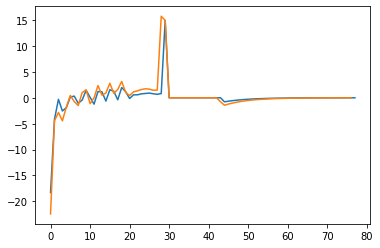

In [ ]:
df_example['u_in_lagback_diff1'].plot()
df_example['u_in_lagback_diff2'].plot();

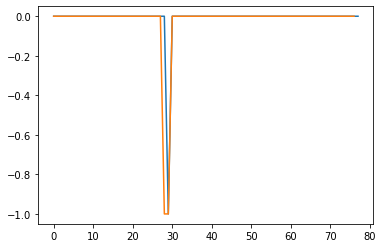

In [ ]:
df_example['u_out_lagback_diff1'].plot()
df_example['u_out_lagback_diff2'].plot();

#### 3.2.8. R - C Feature:

- R, C là các thuộc tính về phổi, có các giá trị như:
  - R: [5, 20, 50]
  - C: [10, 20, 50]
- Tác giả kết hợp R, C và sử dụng như một biến phân loại để cho vào mô hình train.

In [ ]:
df_example['R'] = df_example['R'].astype(str)
df_example['C'] = df_example['C'].astype(str)
df_example['R__C'] = df_example["R"] + '__' + df_example["C"]
df_example = pd.get_dummies(df_example)

In [ ]:
del small_df, df_example
gc.collect()

48707

#### 3.2.9. Tổng hợp tất cả các feature:

So với [notebook Baseline](https://www.kaggle.com/mst8823/google-brain-lightgbm-baseline) và hầu hết các notebook khác, các feature đặc trưng chỉ có tác giả thực hiện như: 
- Trong step 2: **`u_in_lag4, u_in_lag_back4, u_out_lag4, u_out_lag_back4`**
- Trong step 3: **`u_in_diff3, u_out_diff3, u_in_diff4, u_out_diff4`**
- Trong step 5: **`breath_id__u_in_lag, breath_id__u_in_lag2, u_in_lagback_diff1, u_out_lagback_diff1, u_in_lagback_diff2, u_out_lagback_diff2`**
- Trong step 6: **`time_step_diff, ewm_u_in_mean, 15_in_sum, 15_in_min, 15_in_max, 15_in_mean`**

In [ ]:
def add_features(df):
    
    # Step 1:
    df['cross']= df['u_in'] * df['u_out']
    df['cross2']= df['time_step'] * df['u_out']
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['time_step_cumsum'] = df.groupby(['breath_id'])['time_step'].cumsum()
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    
    # Step 2:
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    
    # step 3:
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['breath_id__u_in__mean'] = df.groupby(['breath_id'])['u_in'].transform('mean')
    df['breath_id__u_in__diffmax'] = df.groupby(
        ['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(
        ['breath_id'])['u_in'].transform('mean') - df['u_in']
    
    # Step 4:
    # sự thay đổi u_in so với 1 lần đo trước đó
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    # sự thay đổi u_out so với 1 lần đo trước đó
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    # sự thay đổi u_in so với 2 lần đo trước đó
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    # sự thay đổi u_out  so với 2 lần đo trước đó
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    # sự thay đổi u_in so với 3 lần đo trước đó
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    # sự thay đổi u_out so với 3 lần đo trước đó
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    # sự thay đổi u_in so với 4 lần đo trước đó
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    # sự thay đổi u_out so với 4 lần đo trước đó
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    
    # Step 5:
    # giá trị trung bình của u_in từ lần đo đầu tiên cho đến hiện tại
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] = df['u_in_cumsum'] /df['count']
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    
    # breath_id hiện tại có là breath_id của lần đo trước đó?
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    # breath_id hiện tại có là breath_id của 2 lần đo trước đó?
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)

    # nếu breath_id trùng với lần đo trước, tạo cột có giá trị bằng u_in trước đó
    df['breath_id__u_in_lag'] = df['u_in'].shift(1).fillna(0)
    df['breath_id__u_in_lag'] = df['breath_id__u_in_lag'] * df['breath_id_lagsame']
    
    # nếu breath_id trùng với 2 lần đo trước, tạo cột có giá trị bằng u_in 2 lần đo trước đó
    df['breath_id__u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    df['breath_id__u_in_lag2'] = df['breath_id__u_in_lag2'] * df['breath_id_lag2same']
    
    # Step 6:
    # sự thay đổi time_step so với lần đo trước
    df['time_step_diff'] = df.groupby('breath_id')['time_step'].diff().fillna(0)
    # tính trung bình cộng có trong số của u_in
    df['ewm_u_in_mean'] = (df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))
    # thêm các cột: sum, min, max, mean là tổng , GTNN, GTLN, TB từ lần đo đầu tiên đến lần đó đang xét
    df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (df\
                                                              .groupby('breath_id')['u_in']\
                                                              .rolling(window=15,min_periods=1)\
                                                              .agg({"15_in_sum":"sum",
                                                                    "15_in_min":"min",
                                                                    "15_in_max":"max",
                                                                    "15_in_mean":"mean"})\
                                                               .reset_index(level=0,drop=True))
    
    # Step 07:
    #sự thay đổi của u_in so với 1 lần đo _lag trước đó
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    #sự thay đổi của u_out so với 1 lần đo _lag trước đó
    df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    #sự thay đổi của u_in so với 2 lần đo _lag trước đó
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    #sự thay đổi của u_out so với 2 lần đo _lag trước đó
    df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    
    # Step 08:
    #chuyển đổi cột 'R', 'C' sang kiểu string
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    #nối 2 cột 'R', 'C' lại với nhau
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str) 
    #chuyển đổi các cột có biến chuỗi thành biến chỉ số/giả (tương tự OHE)
    df = pd.get_dummies(df)
    
    return df

Featuring trên tập training:

In [ ]:
train = add_features(train_df)

del train_df
gc.collect()

0

Featuring trên tập test:

In [ ]:
test = add_features(test_df)

del test_df
gc.collect()

0

Drop các cột **`'pressure','id', 'breath_id', 'one','count', 'breath_id_lag', 'breath_id_lag2', 'breath_id_lagsame', 'breath_id_lag2same'`**

In [ ]:
targets = train[['pressure']].to_numpy().reshape(-1, 80)

train.drop(['pressure','id', 'breath_id','one','count',
            'breath_id_lag','breath_id_lag2','breath_id_lagsame',
            'breath_id_lag2same'], axis=1, inplace=True)

test.drop(['id', 'breath_id','one','count','breath_id_lag',
                  'breath_id_lag2','breath_id_lagsame',
                  'breath_id_lag2same'], axis=1, inplace=True)

print(f"train: {train.shape} \ntest: {test.shape}")

train: (6036000, 64) 
test: (4024000, 64)


Ở quá trình chuẩn hóa dữ liệu, RobustScaler sử dụng số liệu thống kê loại bỏ các tác nhân từ các giá trị ngoại lai. Phương pháp scale này loại bỏ trung vị (media) và chia tỉ lệ dữ liệu theo tứ phân vị (Interquartile Range). Điều này đồng nghĩa với việc giảm ảnh hưởng của các giá trị ngoại lai (tác động đến mean và variance).

In [ ]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

train = train.reshape(-1, 80, train.shape[-1])
test = test.reshape(-1, 80, train.shape[-1])

print(f"train: {train.shape} \ntest: {test.shape} \ntargets: {targets.shape}")

train: (75450, 80, 64) 
test: (50300, 80, 64) 
targets: (75450, 80)


In [ ]:
pressure = targets.squeeze().reshape(-1,1).astype('float32')

P_MIN = np.min(pressure)
P_MAX = np.max(pressure)
P_STEP = (pressure[1] - pressure[0])[0]
print('Min pressure: {}'.format(P_MIN))
print('Max pressure: {}'.format(P_MAX))
print('Pressure step: {}'.format(P_STEP))
print('Unique values:  {}'.format(np.unique(pressure).shape[0]))

del pressure
gc.collect()

Min pressure: -1.8957443237304688
Max pressure: 64.82099151611328
Pressure step: 0.07030248641967773
Unique values:  950


176

### 3.3. Hardware config:

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = tpu_strategy.num_replicas_in_sync * 64
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 512
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.117.167.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.117.167.146:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU: grpc://10.117.167.146:8470
Batch Size: 512


### 3.4. Keras DNN Model:

In [ ]:
def dnn_model():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x1 = Bidirectional(LSTM(units=768, return_sequences=True))(x_input)
    x2 = Bidirectional(LSTM(units=512, return_sequences=True))(x1)
    x3 = Bidirectional(LSTM(units=384, return_sequences=True))(x2)
    x4 = Bidirectional(LSTM(units=256, return_sequences=True))(x3)
    x5 = Bidirectional(LSTM(units=128, return_sequences=True))(x4)
    
    z2 = Bidirectional(GRU(units=384, return_sequences=True))(x2)
    
    z31 = Multiply()([x3, z2])
    z31 = BatchNormalization()(z31)
    z3 = Bidirectional(GRU(units=256, return_sequences=True))(z31)
    
    z41 = Multiply()([x4, z3])
    z41 = BatchNormalization()(z41)
    z4 = Bidirectional(GRU(units=128, return_sequences=True))(z41)
    
    z51 = Multiply()([x5, z4])
    z51 = BatchNormalization()(z51)
    z5 = Bidirectional(GRU(units=64, return_sequences=True))(z51)
    
    x = Concatenate(axis=2)([x5, z2, z3, z4, z5])
    
    x = Dense(units=128, activation='selu')(x)
    
    x_output = Dense(units=1)(x)

    model = Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
model = dnn_model()
model.summary()

NameError: ignored

In [ ]:
plot_model(
    model, 
    to_file='Google_Brain_Keras_Model.png', 
    show_shapes=True,
    show_layer_names=True
)

In [ ]:
with tpu_strategy.scope():
    VERBOSE = 0
    test_preds = []
    kf = KFold(n_splits=7, shuffle=True, random_state=2021)
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
        
        model = dnn_model()
        model.compile(optimizer="adam", loss="mae")

        lr = ReduceLROnPlateau(monitor="val_loss", factor=0.85, 
                               patience=7, verbose=VERBOSE)
        
        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')

        chk_point = ModelCheckpoint(f'./Bidirect_LSTM_model_2021_{fold+1}C.h5', options=save_locally, 
                                    monitor='val_loss', verbose=VERBOSE, 
                                    save_best_only=True, mode='min')

        es = EarlyStopping(monitor="val_loss", patience=30, 
                           verbose=VERBOSE, mode="min", 
                           restore_best_weights=True)
        
        model.fit(X_train, y_train, 
                  validation_data=(X_valid, y_valid), 
                  epochs=1,
                  verbose=VERBOSE,
                  batch_size=BATCH_SIZE, 
                  callbacks=[lr, chk_point, es])
        
        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = load_model(f'./Bidirect_LSTM_model_2021_{fold+1}C.h5', options=load_locally)
        
        y_true = y_valid.squeeze().reshape(-1, 1)
        y_pred = model.predict(X_valid, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1)
        score = mean_absolute_error(y_true, y_pred)
        print(f"Fold-{fold+1} | OOF Score: {score}")
        
        test_preds.append(model.predict(test, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1).squeeze()) 

Submission file:

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')
submission["pressure"] = sum(test_preds)/5
submission.to_csv('mean_submission.csv', index=False)

submission["pressure"] = np.median(np.vstack(test_preds),axis=0)
submission["pressure"] = np.round((submission.pressure - P_MIN)/P_STEP) * P_STEP + P_MIN
submission["pressure"] = np.clip(submission.pressure, P_MIN, P_MAX)
submission.to_csv('median_submission.csv', index=False)

### 3.5. Tập hợp các dự đoán `pressure` của bảy model:

Connect đến output từ Kaggle:

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle kernels output kennethnguyen/step-01-build-7-bidirect-lstm-model -p /content/output_kaggle/

Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_1C.h5
Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_2C.h5
Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_3C.h5
Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_4C.h5
Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_5C.h5
Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_6C.h5
Output file downloaded to /content/output_kaggle/Bidirect_LSTM_model_2022_7C.h5
Output file downloaded to /content/output_kaggle/Google_Brain_Keras_Model.png
Output file downloaded to /content/output_kaggle/mean_submission.csv
Output file downloaded to /content/output_kaggle/median_submission.csv
Kernel log downloaded to /content/output_kaggle/step-01-build-7-bidirect-lstm-model.log 


Load model:

In [ ]:
load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')

In [ ]:
test_prediction = []
for i in range(1, 8):
    model = load_model(f'/content/output_kaggle/Bidirect_LSTM_model_2022_{i}C.h5', options=load_locally)
    test_prediction.append(model.predict(test, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1).squeeze())

46' run

In [ ]:
np.array(test_prediction).shape

(7, 4024000)

Đọc https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/280573

Theo cuộc [thảo luận](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/285283), với các input có hai giá trị thì mean cho kết quả tốt hơn median.

In [ ]:
def better_than_median(inputs, axis):
    """Compute the mean of the predictions if there are no outliers,
    or the median if there are outliers.

    Parameter: inputs = ndarray of shape (n_samples, n_folds)"""
    spread = inputs.max(axis=axis) - inputs.min(axis=axis) 
    spread_lim = 0.45
    print(f"Inliers:  {(spread < spread_lim).sum():7} -> compute mean")
    print(f"Outliers: {(spread >= spread_lim).sum():7} -> compute median")
    print(f"Total:    {len(inputs):7}")
    
    return np.where(spread < spread_lim,
                    np.mean(inputs, axis=axis),
                    np.median(inputs, axis=axis))

In [ ]:
pressure_predict = better_than_median(np.array(test_prediction).T, 1)
pressure_predict

Inliers:  2881194 -> compute mean
Outliers: 1142806 -> compute median
Total:    4024000


array([6.2197194, 5.9384875, 6.9092264, ..., 6.232291 , 6.1852098,
       6.303005 ], dtype=float32)

In [ ]:
pressure_predict

array([6.2197194, 5.9384875, 6.9092264, ..., 6.232291 , 6.1852098,
       6.303005 ], dtype=float32)

In [ ]:
temp  =pd.read_csv('/content/sample_submission.csv')
temp['pressure'] = pressure_predict
temp.to_csv('better_than_median.csv', index=False)

In [ ]:
# files = ['/content/output_kaggle/mean_submission.csv',
#          '/content/output_kaggle/median_submission.csv'',
#          '/content/better_than_median.csv']

# sub = pd.read_csv('/content/sample_submission.csv')

# sub['pressure'] = np.median(
#     np.concatenate([pd.read_csv(f)['pressure'].values.reshape(-1, 1) for f in files],
#                    axis=1),
#     axis=1)
# sub.to_csv('median_submission.csv', index=False)
# sub.head(5)

### 3.6. The Inverse PID Controller:

#### 3.6.1. Đọc dữ liệu:

Ý tưởng:
- a

Thực hiện:
- a

Từ tập training, trích xuất cột `pressure` để lấy các giá trị rời rạc 

In [ ]:
train_df = pd.read_csv('/content/train.csv')
targets = train_df[['pressure']].to_numpy()
targets

array([[5.83749171],
       [5.90779385],
       [7.87625392],
       ...,
       [3.79872949],
       [4.07993807],
       [3.86903163]])

Tìm giá trị `pressure` nhỏ nhất và bước của nó

In [ ]:
p_values = np.sort(np.unique(targets))
p_min = p_values[0]
p_step = p_values[1] - p_values[0]
p_min, p_step

(-1.895744294564641, 0.07030214545121005)

Tạo mảng uu hai chiều từ tập dữ liệu test

In [ ]:
test_df = pd.read_csv('/content/test.csv')
relevant = test_df[['u_out']].to_numpy() == 0
uu = test_df[['u_in']].to_numpy().reshape(-1, 80)
rr = relevant.reshape(-1, 80)
t = test_df['time_step'].values.reshape(-1, 80)
# Chỉ 79 columns - Không có dt cho bước cuối cùng
dt_ = t[:,1:] - t[:,:-1]

Sort 950 giá trị `pressure` theo tần số trong bước thời gian đầu tiên để việc tìm kiếm được nhanh chóng. (Chỉ tìm kiếm các giá trị <= 16)

In [ ]:
temp_df = pd.DataFrame(targets.reshape(-1, 80)[:,1], 
                       columns=['pressure'])

temp_df = temp_df.groupby('pressure').size().sort_values(ascending=False)
p_values_by_frequency = list(temp_df.index) + sorted(list(set(p_values[p_values <= 16]).difference(temp_df.index)))
len(p_values_by_frequency)

255

#### 3.6.2. P controller và PI controller:

Tìm và cập nhật tùy chọn tất cả các thử nghiệm sử dụng bộ điều khiển PI

In [ ]:
def is_integer(discrete):
    """
    Kiểm tra nếu các giá trị liên tục kiểu integer.
    Hàm có thể gọi với một array hoặc scalar.
    """
    # Con số phải đủ nhỏ để với hàng triệu lượt gọi, 
    # sẽ không nhận được kết quả dương tính giả (false positive)
    tol = 1e-10
    return (abs(discrete - np.round(discrete)) < tol)

In [ ]:
def find_pi_control(row, uu, rr, dt_, preds, pi_list, pp=None, update_preds=False):
    """Test if row has been generated by a perfect PI controller
    
    Parameters
    ----------
    row          : The row to be processed
    uu           : 2d array of u_in
    rr           : 2d array of (u_out == 0)
    dt_          : 2d array of time differences
    preds        : 2d array of predictions; will be updated if update_preds is True
    pi_list      : list, the found parameters will be appended to this list
    pp           : 2d array of true pressures for evaluation, optional
    update_preds : bool, default False, controls if preds is updated
    
    Global variables
    ----------------
    count, count_bad, mae_gain : updated with evaluation results if pp is not None
    updated                    : count of updated rows
    """
    # Verify parameters and copy a slice [start:end] of the selected row into u, oof, p and dt
    if uu.shape != preds.shape: 
      raise ValueError(f"Shapes of uu and preds must be equal: {uu.shape} {preds.shape}")
    if rr.shape != preds.shape: 
      raise ValueError(f"Shapes of rr and preds must be equal: {rr.shape} {preds.shape}")
    if dt_.shape[0] != preds.shape[0]: 
      raise ValueError(f"First dimension of dt_ and preds must be equal: {dt_.shape} {preds.shape}")
    
    global count, count_bad, ae_gain, updated
    start, end = 1, rr[row].sum()
    p_values_to_try = p_values_by_frequency
    while start < end and (uu[row, start] == 0 or uu[row, start] == 100):
        p_values_to_try = p_values
        start += 1
    if start == end: return # all u_in are 0 or 100
    u = uu[row, rr[row]][start:]
    oof = preds[row, rr[row]][start:]
    if pp is not None: p = pp[row, rr[row]][start:]
    dt = dt_[row, rr[row, 1:]][start:] # typically 1/30
    T = 0.5
    
    def find_pi_coefficients(u, dt, p_values_to_try):
        # u has at least three elements, dt has at least two
        # Determine p_0, p_coef, i_coef and p_star for the start of the slice by grid-search
        # The possible p_0 are searched in order of descending frequency
        # Determine q_0, p_1, q_1, p_2
        # Accept the solution only if p_1 and p_2 are discrete p values
        while len(u) >= 3 and (u[0] == 0 or u[0] == 100 or u[1] == 0 or u[1] == 100 or u[2] == 0 or u[2] == 100):
            u = u[1:]
        if len(u) < 3: return None, None, None, None, None
        p_stars = np.array([10, 15, 20, 25, 30, 35])
        found = False
        s0 = dt[0] / (dt[0] + T)
        s1 = dt[1] / (dt[1] + T)
        for p_0 in p_values_to_try:
            for p_coef in [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                for i_coef in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    if p_coef == 0 and i_coef == 0: continue
                    # u[0] = p_coef * (p_star - p_0) + i_coef * q_0
                    # dt[0] = t[1] - t[0]
                    # s0 = dt[0] / (dt[0] + T)
                    # q_1 = (1-s0) * q_0 + s0 * (p_star - p_1)
                    # u[1] = p_coef * (p_star - p_1) + i_coef * q_1
                    q_0 = (u[0] + p_coef * (p_0 - p_stars)) / i_coef
                    pis = p_coef + i_coef * s0 # positive
                    p_1 = (pis * p_stars + i_coef * (1-s0) * q_0 - u[1]) / pis # array of several possible p_1
                    ii = is_integer((p_1 - p_min) / p_step)
                    if not ii.any(): continue
                    if ii.sum() > 1: print("More than one ***********")
                    p_star = p_stars[ii.argmax()]
                    p_1 = p_1[ii.argmax()] # scalar p_1
                    q_1 = (1-s0) * q_0[ii.argmax()] + s0 * (p_star - p_1) # scalar q_1
                    pis = p_coef + i_coef * s1 # positive
                    p_2 = (pis * p_star + i_coef * (1-s1) * q_1 - u[2]) / pis # scalar p_2
                    if not is_integer((p_2 - p_min) / p_step): continue
                    if np.abs(p_1 - p_2) < 1e-10: print('p_1 == p_2', p_0, p_1, p_2, p_coef, i_coef, p_star); return None, None, None, None, None
                    found = True
                    break
                if found: break
            if found: break
        if not found: return None, None, None, None, None
        return p_0, p_coef, i_coef, p_star, q_0[ii.argmax()]
    
    # Try to determine the coefficients twice: once at the beginning of the inhalation phase and once towards the end
    p_0, p_coef, i_coef, p_star, q = find_pi_coefficients(u, dt, p_values_to_try)
    q_is_valid = p_0 is not None
    if p_0 is None:
        p_0, p_coef, i_coef, p_star, q = find_pi_coefficients(u[-9:], dt[-8:], p_values) # last three elements of u; dt is one element shorter
        q_is_valid = False
        if p_0 is None: return

    # At this point we have found parameters p_0, p_coef, i_coef and p_star which give discrete
    # values for the first three time steps, and we may have q_0

    # Compute the new predictions
    update_list = [] # for plotting
    pred_new = oof.copy()
    if q_is_valid and p_coef != 0:
        last_valid, last_delta = 0, p_0 - pred_new[0]
        pred_new[0] = p_0
        update_list.append((start, p_0))
    for i in range(1, len(pred_new)):
        # Invariant: pred_new[:i] has been computed
        # Invariant: q is the state of the PI controller or not q_is_valid
        # We want to determine pred_new[i]
        if u[i] == 0 or u[i] == 100: 
            q_is_valid = False # u has been clipped; we cannot compute p here
            continue
        if q_is_valid:
            s = dt[i-1] / (dt[i-1] + T) # ca. 1/16
            pis = p_coef + i_coef * s # positive
            pni = (pis * p_star + i_coef * (1-s) * q - u[i]) / pis # candidate pred_new[i]
            if is_integer((pni - p_min) / p_step):
                last_valid, last_delta = i, pni - pred_new[i]
                pred_new[i] = pni
                update_list.append((start+i, pni))
                q = (u[i] + p_coef * (pred_new[i] - p_star)) / i_coef
            else:
                #print(f"Out of sync {start + i}")
                q_is_valid = False
        else:
            # Try to resynchronize the controller state after a phase which didn't use the PI controller
            if i >= len(pred_new) - 2: break # we cannot resynchronize the last two
            if u[i+1] == 0 or u[i+1] == 100 or u[i+2] == 0 or u[i+2] == 100: continue
            s_i = dt[i] / (dt[i] + T)
            s_i1 = dt[i+1] / (dt[i+1] + T)
            pis = p_coef + i_coef * s_i # positive
            for p_i in p_values:
                q_i = (u[i] + p_coef * (p_i - p_star)) / i_coef
                p_i1 = (pis * p_star + i_coef * (1-s_i) * q_i - u[i+1]) / pis
                if not is_integer((p_i1 - p_min) / p_step): continue
                q_i1 = (1-s_i) * q_i + s_i * (p_star - p_i1)
                pis = p_coef + i_coef * s_i1
                p_i2 = (pis * p_star + i_coef * (1-s_i1) * q_i1 - u[i+2]) / pis
                if not is_integer((p_i2 - p_min) / p_step): continue
                #print(f"Resynchronized {i} {q_i:.3f}  {p_i:.3f}  {p_i1:.3f}  {(p_i1 - p_min) / p_step}")
                if p_coef != 0: # for p_coef == 0, q_i doesn't depend on p_i
                    last_valid, last_delta = i, p_i - pred_new[i]
                    pred_new[i] = p_i
                    update_list.append((start+i, p_i))
                q, q_is_valid = q_i, True
                break

    pred_new[(u < 1e-6) & (oof > pred_new)] = oof[(u < 1e-6) & (oof > pred_new)]
    pred_new[(u > 99.9999) & (oof < pred_new)] = oof[(u > 99.9999) & (oof < pred_new)]
    
    # For training data (where we know the true pressure): verify that the error is getting smaller
    if pp is not None and not update_preds:
        mae_pred = mean_absolute_error(p, pred_new)
        ae_gain_1 = np.abs(p - oof).sum() - np.abs(p - pred_new).sum() # should be nonnegative 
        print(f'Row {row:2}: Gain {ae_gain_1:6.3f}')
        ae_gain += ae_gain_1
        if ae_gain_1 < 0:
            print(f"Row: {row}")
            print(f"MAE OOF:  {mean_absolute_error(p, oof):.3f}")
            print(f"MAE Pred: {mae_pred:.3f}")
            print(f"Start: {start}")
            plt.figure(figsize=(10, 4))
            plt.title(f"p_coef = {p_coef:.2f}, i_coef = {i_coef:.2f}, p_star = {p_star:.0f}")
            plt.plot(np.arange(start, end), u, label='u_in')
            plt.scatter(*zip(*update_list), marker='o', label='updated pressure')
            plt.scatter(np.arange(start, end)[u == 0], u[u == 0], marker='x') # clipped u_in which is useless for predictions
            plt.plot(np.arange(start, end), oof, label='pressure_pred_oof')
            plt.plot(np.arange(start, end), pp[row, rr[row]][start:end], label='pressure_true')
            #plt.scatter(np.arange(start, end), pred_new, label='pressure_pred_new')
            #plt.plot(np.arange(len(uu[row])), uu[row]) # 80 steps of u_in
            #plt.plot(np.arange(len(pp[row])), pp[row]) # 80 steps of pressure_true
            plt.legend()
            plt.show()
            count_bad += 1
        else:
            count += 1

    # Keep the parameters for future reference
    pi_list.append((row, p_coef, i_coef, p_star, np.abs(oof - pred_new).sum()))
    
    # For test data: update the predictions
    if update_preds:
        exhale = rr[row].argmin()
        preds[row, start:exhale] = pred_new
        updated += 1

In [ ]:
# Test the function on a subset of the training data
# if the training data is available and pp is defined
try:
    pi_list, count, count_bad, ae_gain = [], 0, 0, 0
    for row in range(len(pp) // 10, len(pp) // 5): # [79, 133, 219]: # [106, 171, 455]: # 
        find_pi_control(row, uu, rr, dt_, oof_pred, pi_list, pp)
    if count > 0 or count_bad > 0:
        print("Count:", count, count_bad)
        print("AE gain:", ae_gain)
    pi_df = pd.DataFrame(pi_list, columns=['row', 'p_coef', 'i_coef', 'p_star', 'difference'])
    print(f"Cumulated difference: {pi_df['difference'].sum():.3f}")
    display(pi_df)
except NameError as e:
    print("Warning: NameError caught", e)

Tìm và cập nhật tất cả các thử nghiệm chỉ sử dụng bộ điều khiển P.

In [ ]:
def find_p_control(row, uu, rr, preds, p_list, pp=None, update_preds=False):
    """Test if row has been generated by a perfect P controller
    
    Parameters
    ----------
    row          : The row to be processed
    uu           : 2d array of u_in
    rr           : 2d array of (u_out == 0)
    preds        : 2d array of predictions; will be updated if update_preds is True
    p_list       : list, the found parameters will be appended to this list
    pp           : 2d array of true pressures for evaluation, optional
    update_preds : bool, default False, controls if preds is updated
    
    Global variables
    ----------------
    row_set                    : set of row numbers with P controller
    count, count_bad, mae_gain : updated with evaluation results if pp is not None
    updated                    : count of updated rows
    """
    # Verify parameters and copy the selected row into u, oof and p
    if uu.shape != preds.shape: raise ValueError(f"Shapes of uu and preds must be equal: {uu.shape} {preds.shape}")
    if rr.shape != preds.shape: raise ValueError(f"Shapes of rr and preds must be equal: {rr.shape} {preds.shape}")
    global row_set, count, count_bad, ae_gain, updated
    start, end = 1, rr[row].sum()
    u = uu[row, rr[row]][start:]
    oof = preds[row, rr[row]][start:]
    if pp is not None: p = pp[row, rr[row]][start:]
        
    def find_p_coefficients(u):
        """Take four samples from the series and determine p_coef and p_star
        
        Return (p_coef, p_star) if the breath is using a P controller
        Return (None, None) if it is not a P controller"""
        for i in [0, len(u) // 3, len(u) * 2 // 3, len(u) - 1]:
            if u[i] != 0 and u[i] != 100:
                for p_coef in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
                    for p_star in [10, 15, 20, 25, 30, 35]:
                        predicted_p_int = (p_star - u[i] / p_coef - p_min) / p_step
                        if predicted_p_int >= 0 and predicted_p_int < len(p_values) and is_integer(predicted_p_int):
                            return p_coef, p_star
        return None, None

    p_coef, p_star = find_p_coefficients(u)
    if p_coef is None: return
        
    # Compute the new predictions
    # If anything is strange about them, keep the original predictions
    # If u_in is 0, the new prediction will be too low and not a discrete value
    # -> we may round the prediction up
    # -> we should keep the original prediction if it is higher
    # If u_in is 100, the new prediction will be too high and not a discrete value
    # -> we may round the prediction down
    # we should keep the original prediction if it is lower
    pred_new = p_star - u / p_coef
    pred_new_int = (pred_new - p_min) / p_step
    strange = ((pred_new_int < 0) | (pred_new_int >= len(p_values)) | (~is_integer(pred_new_int))) & (u != 0) & (u != 100)
    if strange.any():
        print('strange', row, strange)
        return
    pred_new[u == 0] = np.ceil(pred_new_int[u == 0]) * p_step + p_min
    pred_new[(u == 0) & (oof > pred_new)] = oof[(u == 0) & (oof > pred_new)]
    pred_new[u == 100] = np.floor(pred_new_int[u == 100]) * p_step + p_min
    pred_new[(u == 100) & (oof < pred_new)] = oof[(u == 100) & (oof < pred_new)]
    
    
    if pp is not None and not update_preds:
        mae_pred = mean_absolute_error(p, pred_new)
        ae_gain_1 = np.abs(p - oof).sum() - np.abs(p - pred_new).sum() # absolute error improvement should be positive 
        ae_gain += ae_gain_1
        if ae_gain_1 < 0: # mae_pred > 0.00001: #
            print(f"Row: {row}")
            print(f"Candidate p_coef: {p_coef:.6f}")
            print(f"Candidate p_star: {p_star:.6f}")
            print(f"MAE OOF:  {mean_absolute_error(p, oof):.3f}")
            print(f"MAE Pred: {mae_pred:.3f}")
            plt.figure(figsize=(10, 4))
            plt.title(f"p_coef = {p_coef:.2f}, p_star = {p_star:.0f}")
            plt.plot(np.arange(start, end), u, label='u_in')
            #plt.plot(np.arange(start, end), oof, label='pressure_pred_oof')
            plt.plot(np.arange(start, end), pred_new, label='pressure_pred_new')
            plt.plot(np.arange(end), pp[row, rr[row]], label='pressure_true')
            #plt.plot(np.arange(len(uu[row])), uu[row]) # all 80 u_in
            #plt.plot(np.arange(len(pp[row])), pp[row]) # all 80 true pressures
            plt.scatter(np.arange(start, end)[u < 1e-6], u[u < 1e-6]) # mark zeros of u_in
            plt.legend()
            if row in [1, 537, 634, 1098, 3193, 9847, 10398, 13828]: plt.savefig(f"p-control-{row}.png")
            plt.show()
            count_bad += 1
        else:
            count += 1

    # Keep the parameters for future reference
    p_list.append((row, p_coef, p_star, np.abs(oof - pred_new).sum()))
    
    # For test data: update the predictions
    if update_preds:
        exhale = rr[row].argmin()
        preds[row, 1:exhale] = pred_new
        updated += 1
        
    try:
        row_set.add(row)
    except NameError:
        pass

In [ ]:
# Test the function if the training data is available and pp is defined
p_list, row_set, count, count_bad, ae_gain = [], set(), 0, 0, 0
try:
    for row in range(len(pp)):
        find_p_control(row, uu, rr, oof_pred, p_list, pp)
    if count > 0 or count_bad > 0:
        print("Count:", count, count_bad)
        print("AE gain:", ae_gain)
        if ae_gain <= 0: raise ValueError("MAE gain is not positive")
    p_df = pd.DataFrame(p_list, columns=['row', 'p_coef', 'p_star', 'difference'])
    print(f"Cumulated difference: {p_df['difference'].sum():.3f}")
    display(p_df.head())
except NameError as e:
    print("Warning: NameError caught", e)

#### 3.6.3. Cập nhật kết quả prediction:


The full computation takes more than nine hours and cannot be run on Kaggle. I have run the exact same notebook locally and uploaded the result as a dataset. If the dataset is available, the notebook skips the full computation; if the dataset is unavailable, the notebook performs the full, lengthy computation.

In [ ]:
try:
    sub = pd.read_csv('/content/submission_pi_20211101.csv')
    p_df = pd.read_csv('/content/p_parameters.csv')
    pi_df = pd.read_csv('/content/pi_parameters.csv')
    use_shortcut = True
    print("Using the shortcut to save CPU time")
except FileNotFoundError:
    sub = pd.read_csv('better_than_median.csv')
    use_shortcut = False
    print("Doing the full computation (no shortcut)")

Doing the full computation (no shortcut)


In [ ]:
def find_pi_control_slice(a, b):
    """Return the updated rows a:b of oof_copy.
    
    This function is meant to be run in a parallel job."""
    oof_copy2 = ss.copy() # make a writable copy for this job
    pi_list = []
    for row in range(a, b):
        find_pi_control(row, uu, rr, dt_, oof_copy2, pi_list, pp=None, update_preds=True)
    return oof_copy2[a:b], pi_list

In [ ]:
%%time
ss = sub.pressure.values.reshape(-1, 80)
ss_copy = ss.copy()
n_jobs = -1
stop = 10 if use_shortcut else len(ss)
pi_list, updated = [], 0

a_list = [stop // n_jobs * i for i in range(n_jobs)]
b_list = a_list[1:] + [stop]
updated_slices = Parallel(n_jobs=n_jobs)(delayed(find_pi_control_slice)(a, b)
                                         for a, b in zip(a_list, b_list))

CPU times: user 65.2 ms, sys: 18.2 ms, total: 83.4 ms
Wall time: 87.7 ms


In [ ]:
for (new_slice, slice_pi_list), a, b in zip(updated_slices, a_list, b_list):
    ss[a:b] = new_slice
    pi_list += slice_pi_list

print(f"Modified {(ss != ss_copy).any(axis=1).sum()} rows of {len(ss)} in parallel for the PI controllers.")
if not use_shortcut: pi_df = pd.DataFrame(pi_list, columns=['row', 'p_coef', 'i_coef', 'p_star', 'difference'])
print(f"Cumulated difference: {pi_df['difference'].sum():.3f}")
with open('pi_parameters.pickle', 'wb') as handle: pickle.dump(pi_df, handle)
pi_df.to_csv('pi_parameters.csv', index=False)
display(pi_df)

Modified 0 rows of 50300 in parallel for the PI controllers.
Cumulated difference: 0.000


,row,p_coef,i_coef,p_star,difference


In [ ]:
# Update for the P controllers
p_list = []
for row in range(len(ss)):
    find_p_control(row, uu, rr, ss, p_list, update_preds=True)
print(f"Updated {updated} rows for the P controllers.")
if not use_shortcut: p_df = pd.DataFrame(p_list, columns=['row', 'p_coef', 'p_star', 'difference'])
print(f"Cumulated difference: {p_df['difference'].sum():.3f}")
with open('p_parameters.pickle', 'wb') as handle: pickle.dump(p_df, handle)
p_df.to_csv('p_parameters.csv', index=False)
display(p_df)

Updated 1270 rows for the P controllers.
Cumulated difference: 11155.160


,row,p_coef,p_star,difference
0,70,0.6,15,22.152533
1,97,0.3,30,79.274611
2,161,0.2,15,33.476896
3,220,5.0,20,3.693387
4,284,8.0,10,0.537166
...,...,...,...,...
1265,50144,7.0,25,4.827152
1266,50153,0.6,10,12.012373
1267,50183,0.1,25,14.760030
1268,50216,0.8,30,29.565065


In [ ]:
# Files submission
sub["pressure"] = ss.ravel()
sub.to_csv('submission_pi.csv', index=False)
sub.head(5)

,id,pressure
0,1,6.219719
1,2,5.938487
2,3,6.909226
3,4,7.557904
4,5,8.971015


### 3.7. Kết quả submission:

Nhóm đã thử submit kết quả lên cuộc thi, điểm số mà nhóm nhận được là **0.2364**

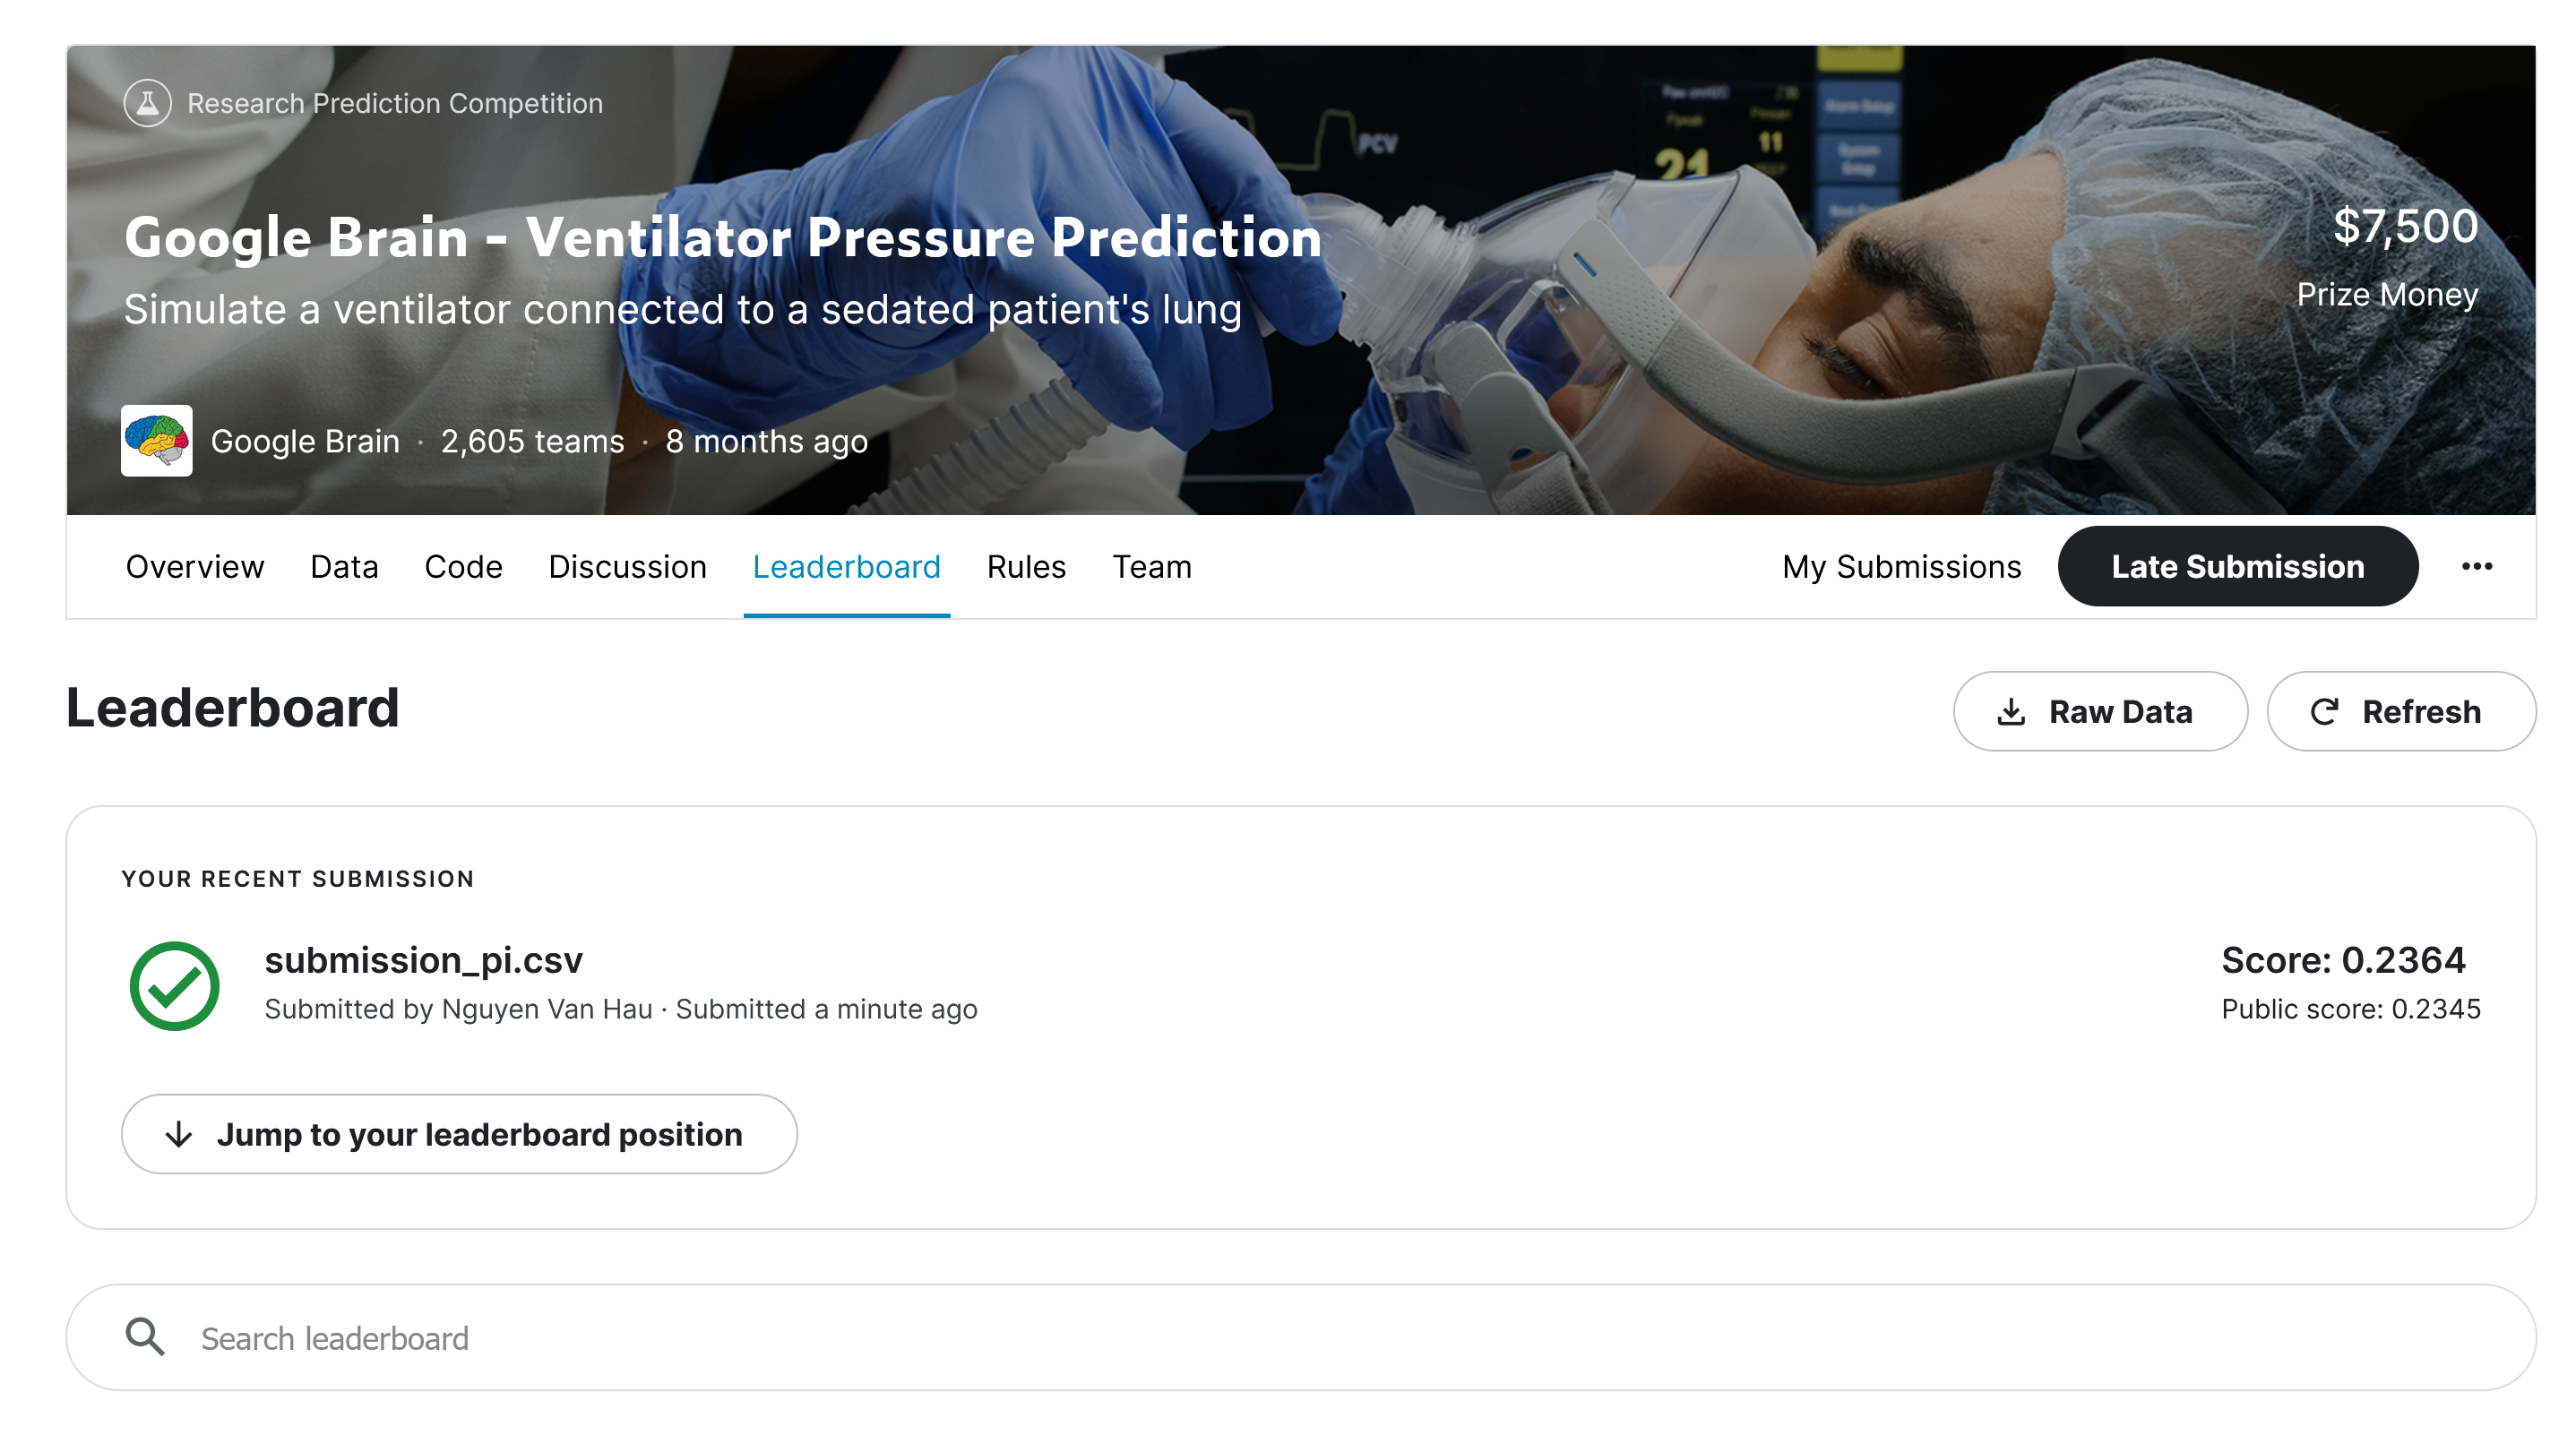

Theo bảng Private Leaderboard,** thứ hạng** của team có cùng điểm số với nhóm là **1632/2556**.

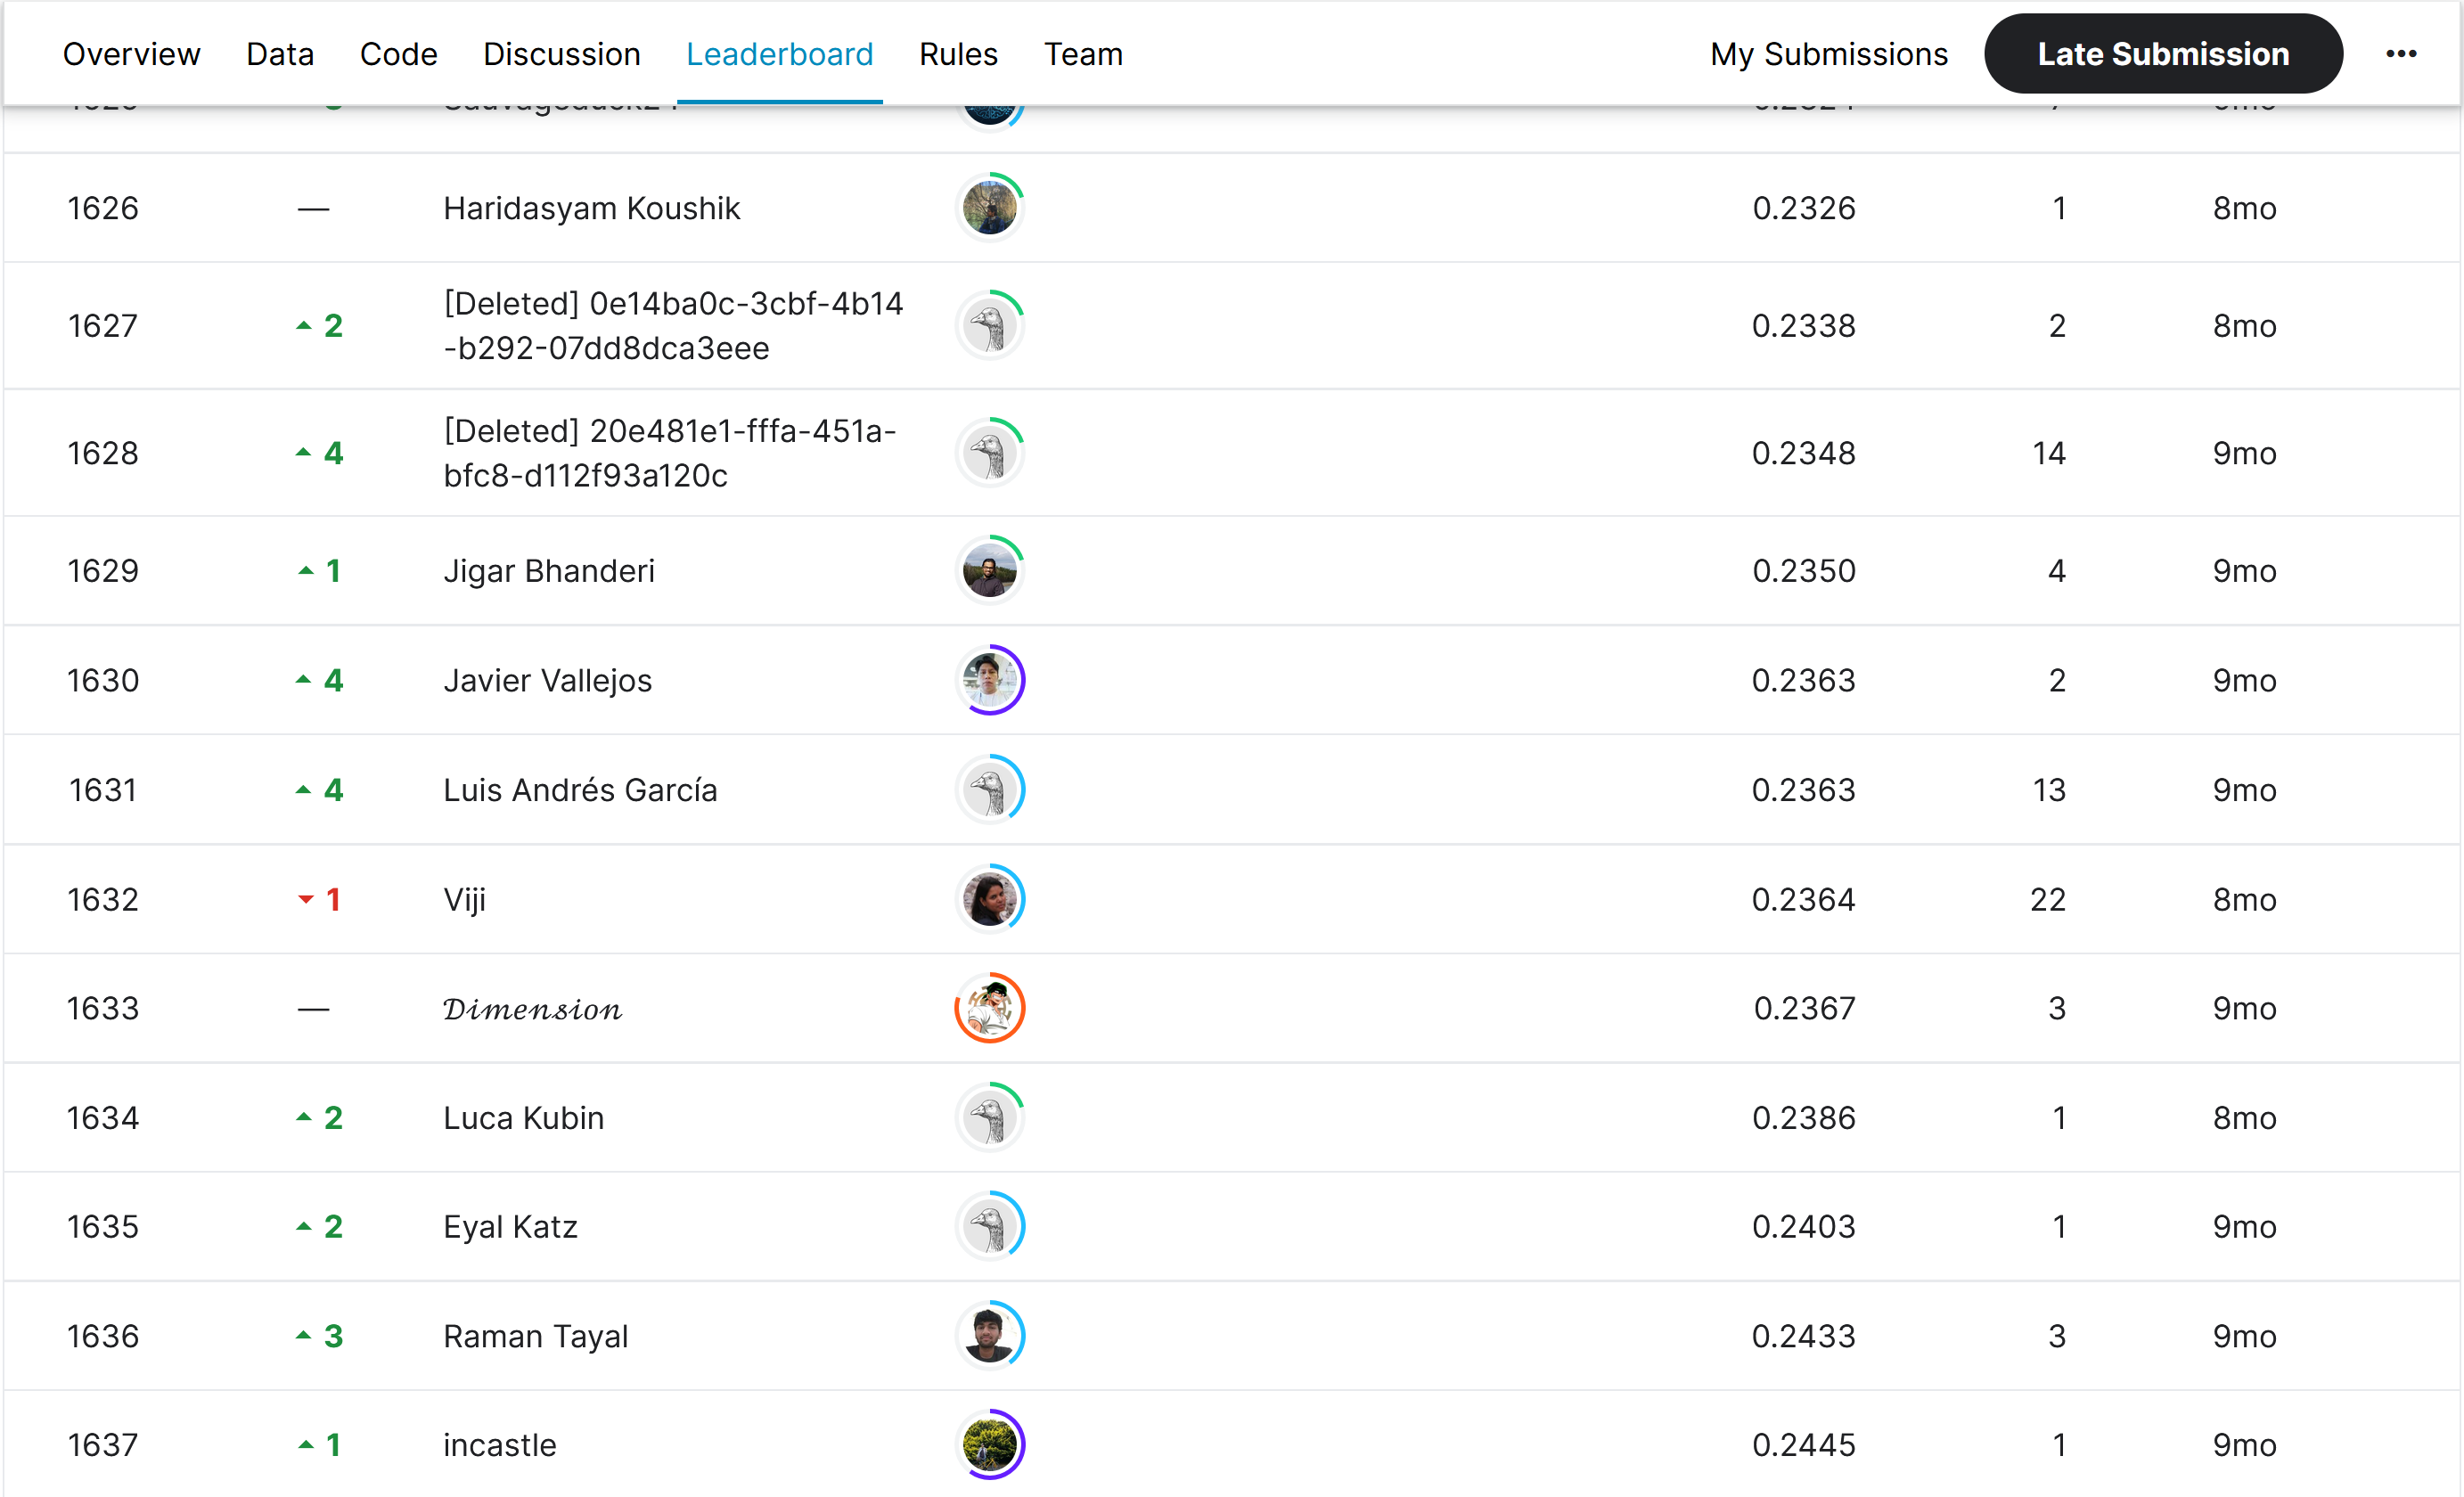

## 4. Nhìn lại quá trình làm đồ án:

### 4.1. Nguyễn Hoàng Sơn:

- Khó khăn:
    + 
    +
    + 

- Học được:
    + 
    +
    +

### 4.2. Nguyễn Văn Hậu:

- Khó khăn:
 
- Học được:
   

### 4.3. Nguyễn Đình Tuyên:

(không có)

### 4.4. Nhóm:

Nếu có thêm thời gian, nhóm sẽ cố gắng thực hiện:
- Trình bày chi tiết hơn quá trình PID Controller.
- Thử tinh chỉnh (tuning) các parameter của cả quá trình xây dựng model và điều chỉnh PID để đạt thứ hạng, kết quả cao hơn.
- Cài đặt thêm phần D trong điều chỉnh PID - phần mà nhóm có solution top 1 đang cài đặt.

## 5. Tài liệu tham khảo:

Để hoàn thành đồ án này, nhóm mình đã tham khảo những tài liệu sau:
1. Cuộc thi [Google Brain - Ventilator Pressure Prediction](https://www.kaggle.com/competitions/ventilator-pressure-prediction) trên Kaggle.
2. Solution: Team đứng [top 2 leaderboard](https://www.kaggle.com/competitions/ventilator-pressure-prediction/discussion/285283).
3. Solution: Team đứng [top 1 leaderboard](https://www.kaggle.com/competitions/ventilator-pressure-prediction/discussion/285256).
4. Notebook: Xây dựng model cho bài toán tại [GB - VPP - Pulp Fiction by @DLastStark](https://www.kaggle.com/code/dlaststark/gb-vpp-pulp-fiction/notebook).
5. Discussion: Về quá trình ensembling [Better than median](https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/282735).
6. Notebook: Đề xuất và trực quan hóa những feature quan trọng cho bài toán tại [LSTM Feature Importance](https://www.kaggle.com/code/cdeotte/lstm-feature-importance/notebook).
7. Discussion: Recap top-solution, top-notebooks, top-discussions [Competition is Finalized - Congratulations to our Winners; Recap](https://www.kaggle.com/competitions/ventilator-pressure-prediction/discussion/286388).
8. Paper: [Machine Learning for Mechanical Ventilation Control](https://arxiv.org/pdf/2102.06779.pdf).
9. Kiến thức chuyên môn y học để giải thích ứng dụng của bài toán:  [Theo dõi Bệnh nhân thở máy - BS. Đặng Thanh Tuấn - BV Nhi Đồng 1](https://quantri.nhidong.org.vn/Data/bvnhidong/bvnhidong/Attachments/2019_3/07_theo_doi_benh_nhan_tho_may_-_2015-04_263201916.pdf).
